In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
file_path = 'AusApparalSales4thQrt2020.csv'
data = pd.read_csv(file_path)

1. Data Wrangling

In [3]:
# a. Ensure that the data is clean and free from any missing or incorrect entries. 
no_missing_data = data.notna()
missing_data = data.isna()

if missing_data.values.any():
    print('there is missing data!')
else:
    print('no missing data!')


no missing data!


b. Based on your knowledge of Data Analytics, include your 
recommendations for treating missing and incorrect dat.

Ans: 
There are many ways to fill the missing data, which could be adding median or mean for numerical data, or adding the mode for categorical data. They are also depended on the nature of the data and the analysis needs.a

In [4]:
# c. Execute the preferred normalization method and present the resulting data. 

# normalization of the 'Unit' and 'Sales'.
data['Unit'] = (data['Unit'] - data['Unit'].min()) / (data['Unit'].max() - data['Unit'].min())
data['Sales'] = (data['Sales'] - data['Sales'].min()) / (data['Sales'].max() - data['Sales'].min())

In [5]:
# d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

# groupby() data truncking
grouped_data = data.groupby(['Time', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'})
print(grouped_data)

                        Sales        Unit
Time      Group                          
Afternoon Kids     160.968254  160.968254
          Men      162.650794  162.650794
          Seniors  159.015873  159.015873
          Women    161.222222  161.222222
Evening   Kids     158.111111  158.111111
          Men      159.190476  159.190476
          Seniors  153.126984  153.126984
          Women    161.238095  161.238095
Morning   Kids     161.063492  161.063492
          Men      162.603175  162.603175
          Seniors  161.428571  161.428571
          Women    160.031746  160.031746


The GroupBy() function split the dataset into groups based on different columns. Analyze the sales according to different times of the day can help to make marketing strategies according to customers' behavior patterns, especially about the days in a week. 

2. Data Analysis

In [6]:
# a. descriptive statistical analysis on the data in the Sales and Unit columns

mean_s = data['Sales'].mean()
median_s = data['Sales'].median()
mode_s = data['Sales'].mode()[0]
std_dev_s = data['Sales'].std()

mean_u = data['Unit'].mean()
median_u = data['Unit'].median()
mode_u = data['Unit'].mode()[0]
std_dev_u = data['Unit'].std()

print("Sales - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_s, median_s, mode_s, std_dev_s))
print("Units - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_u, median_u, mode_u, std_dev_u))

Sales - Mean: 0.25, Median: 0.19, Mode: 0.11, Std Dev: 0.20
Units - Mean: 0.25, Median: 0.19, Mode: 0.11, Std Dev: 0.20


In [7]:
# b. Identify the group with the highest sales and the group with the lowest sales based on the data provided. 

# group by the group and sales
group_sales_summary = data.groupby('Group')['Sales'].sum()
# find the highest and lowest group
highest_sales_group = group_sales_summary.idxmax()
lowest_sales_group = group_sales_summary.idxmin()

print('Group with the highest sales:', highest_sales_group)
print('Group with the lowest sales:', lowest_sales_group)


Group with the highest sales:  Men
Group with the lowest sales:  Seniors


In [8]:
# c. Identify the group with the highest and lowest sales based on the data provided. 

# find the maximum and minimum sales for each group
group_sales_extremes = data.groupby('Group')['Sales'].agg([max, min])

print('Maximum and minimum sales for each group:\n', group_sales_extremes)

Maximum and minimum sales for each group:
               max  min
Group                 
Kids     1.000000  0.0
Men      0.984127  0.0
Seniors  1.000000  0.0
Women    1.000000  0.0


C:\Users\13195\AppData\Local\Temp\ipykernel_33972\463645526.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  group_sales_extremes = data.groupby('Group')['Sales'].agg([max, min])
C:\Users\13195\AppData\Local\Temp\ipykernel_33972\463645526.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  group_sales_extremes = data.groupby('Group')['Sales'].agg([max, min])


In [9]:
print(data.columns)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [10]:
# use 'Date' as the index
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
weekly_s = data.groupby(pd.Grouper(key='Date', freq='W')).sum()
monthly_s = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
quarterly_s = data.groupby(pd.Grouper(key='Date', freq='Q')).sum()

print("Weekly Sales and Units:\n", weekly_s[['Sales', 'Unit']])
print("Monthly Sales and Units:\n", monthly_s[['Sales', 'Unit']])
print("Quarterly Sales and Units:\n", quarterly_s[['Sales', 'Unit']])

Weekly Sales and Units:
                  Sales        Unit
Date                              
2020-10-04   84.857143   84.857143
2020-10-11  152.777778  152.777778
2020-10-18  150.476190  150.476190
2020-10-25  151.587302  151.587302
2020-11-01  122.460317  122.460317
2020-11-08  113.809524  113.809524
2020-11-15  115.761905  115.761905
2020-11-22  115.380952  115.380952
2020-11-29  117.698413  117.698413
2020-12-06  169.412698  169.412698
2020-12-13  181.492063  181.492063
2020-12-20  182.317460  182.317460
2020-12-27  183.047619  183.047619
2021-01-03   79.571429   79.571429
Monthly Sales and Units:
                  Sales        Unit
Date                              
2020-10-31  645.650794  645.650794
2020-11-30  495.761905  495.761905
2020-12-31  779.238095  779.238095
Quarterly Sales and Units:
                   Sales         Unit
Date                                
2020-12-31  1920.650794  1920.650794


C:\Users\13195\AppData\Local\Temp\ipykernel_33972\3438028484.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_s = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
C:\Users\13195\AppData\Local\Temp\ipykernel_33972\3438028484.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_s = data.groupby(pd.Grouper(key='Date', freq='Q')).sum()


3. Data visualization 

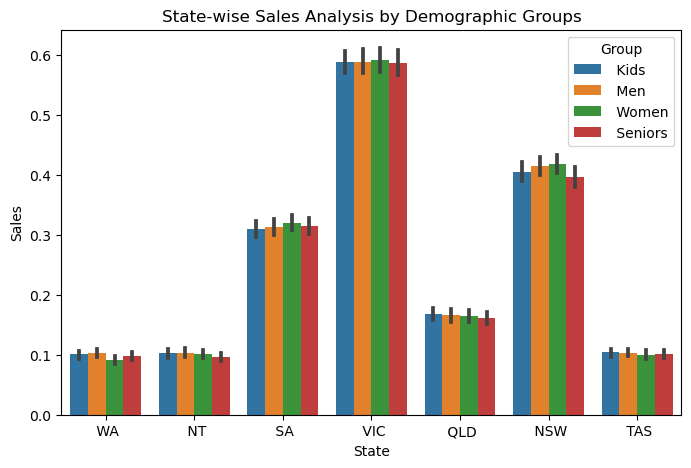

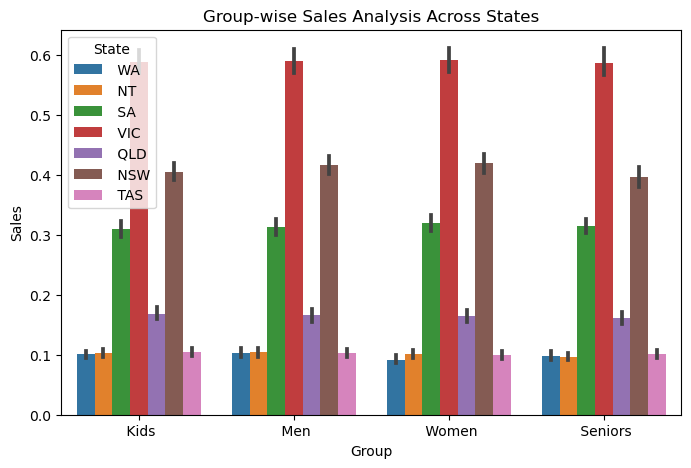

C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


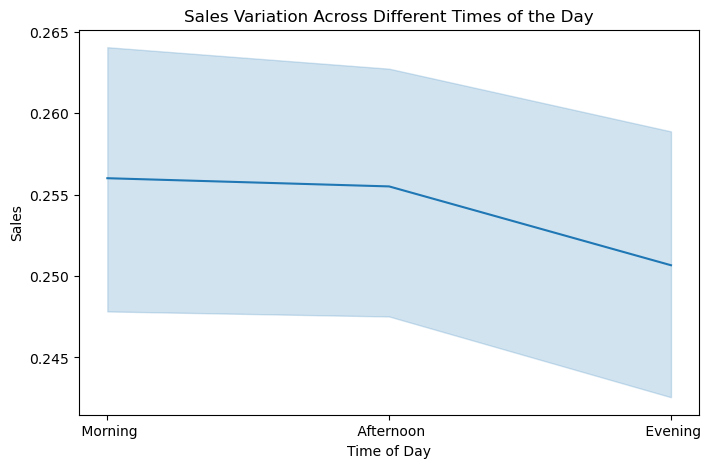

In [12]:
# a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M)
    #key parameters: 
        # State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors). 
        # Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States. 
        # Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
        #This information aids in designing programs like hyperpersonalization and Next Best Offers to enhance sales. 

## State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors). 
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Sales', hue='Group', data=data)
plt.title('State-wise Sales Analysis by Demographic Groups')
plt.ylabel('Sales')
plt.xlabel('State')
plt.legend(title='Group')
plt.show()

## Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States. 
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Sales', hue='State', data=data)
plt.title('Group-wise Sales Analysis Across States')
plt.ylabel('Sales')
plt.xlabel('Group')
plt.legend(title='State')
plt.show()

## Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Sales', data=data)
plt.title('Sales Variation Across Different Times of the Day')
plt.ylabel('Sales')
plt.xlabel('Time of Day')
plt.show()


C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


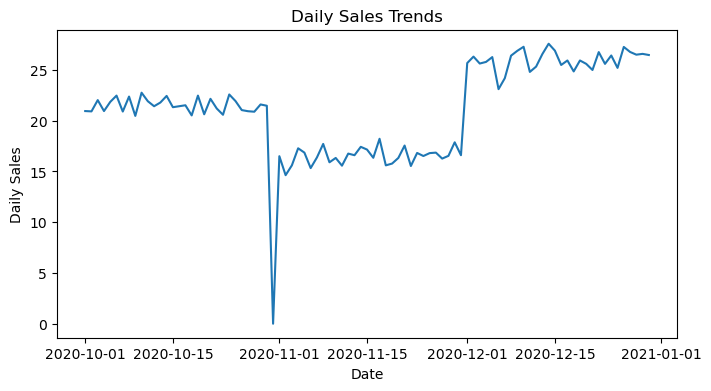

C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


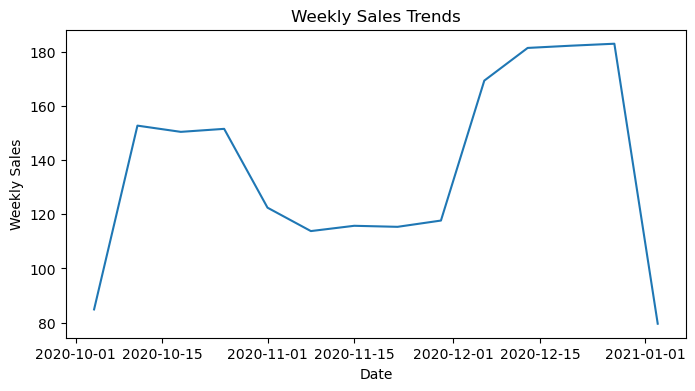

C:\Users\13195\AppData\Local\Temp\ipykernel_33972\2809813188.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Sales'].resample('M').sum()
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


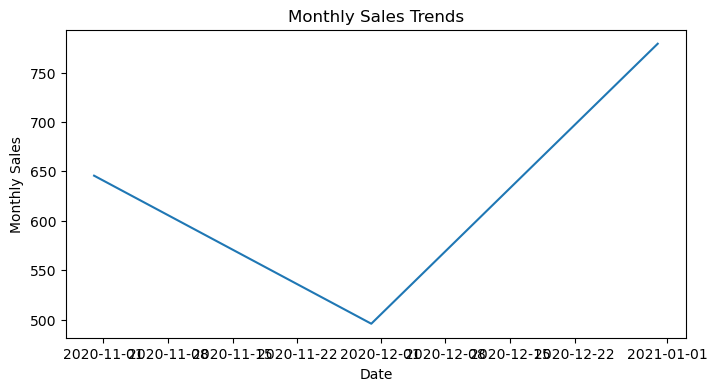

C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\13195\.conda\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


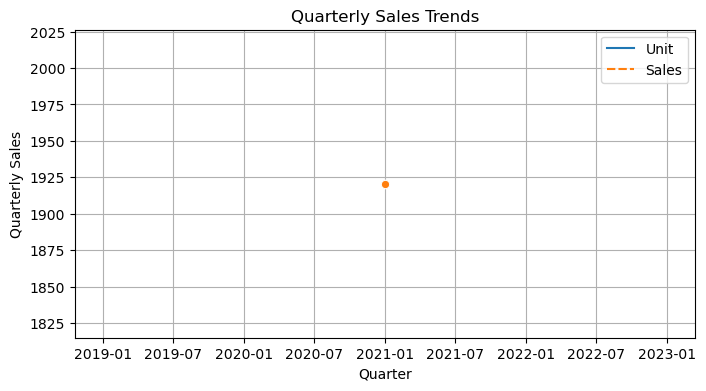

In [13]:
# b. The dashboard must contain daily, weekly, monthly, and quarterly charts. 

if data.index.name != 'Date':
    data.set_index('Date', inplace=True)
# Daily sales
daily_sales = data['Sales'].resample('D').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=daily_sales)
plt.title('Daily Sales Trends')
plt.ylabel('Daily Sales')
plt.xlabel('Date')
plt.show()

# Weekly sales
weekly_sales = data['Sales'].resample('W').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Trends')
plt.ylabel('Weekly Sales')
plt.xlabel('Date')
plt.show()

# Monthly sales
monthly_sales = data['Sales'].resample('M').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()

# Plotting the quarterly data
plt.figure(figsize=(8, 4))
sns.lineplot(data=quarterly_s, marker='o')  # Adding marker='o' to show the point clearly
plt.title('Quarterly Sales Trends')
plt.ylabel('Quarterly Sales')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()



c. Include your recommendation and indicate why you are choosing the recommended visualization package. 

Recommendation: I highly recommand the libraries of Seaborn and Matplotlib. Using these two libraries can allow us to conduct complex visualizations. Seaborn is based on but better than Matplotlib, which provides better interface and easy to use. It also produce better looking visualizations.
